In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('datasets/car.data')
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# Initializing labels and attributes

In [19]:
X = data[['buying', 'maint', 'safety']].values #attributes ->values will be given by user
Y = data[['class']] #labels ->output given by the model
X

array([['vhigh', 'vhigh', 'med'],
       ['vhigh', 'vhigh', 'high'],
       ['vhigh', 'vhigh', 'low'],
       ...,
       ['low', 'low', 'low'],
       ['low', 'low', 'med'],
       ['low', 'low', 'high']], dtype=object)

# Labels
#### Attributes from both X&Y are in strings. Conversion should be done to int to get the appropriate output. This can be achieved in two ways: Label Encoding and Label Mapping. I'll be using the former for X and the latter for Y

# Encoding
#### So the values vhigh, high, low are in string. We need to output them in numbers[3-vhigh, 2-med, 1-high, 0-low]
#### For this we'll be using the LabelEncoder

In [22]:
le = LabelEncoder()
for i in range(len(X[0])): #X[0] be'cuz each instance in X has 3 attributes [buying, maint,safety]
    X[:, i] = le.fit_transform(X[:, i]) #X[:, i] -> ':' is all columns and 'i' is each row
X

array([[3, 3, 2],
       [3, 3, 0],
       [3, 3, 1],
       ...,
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 0]], dtype=object)

# Mapping
### Use dict. to initailize values for unacc, acc, good, vgood and use the map() fn for each value of y['class']

In [32]:
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
Y['class'] = Y['class'].map(label_mapping)
#convert it to np.array
Y = np.array(Y)
Y

<ipython-input-32-8c4ac46c8ec9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['class'] = Y['class'].map(label_mapping)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [2],
       [3]], dtype=int64)

- [x] (Data is ready)
- [x] (attributes are ready)
- [x] (labels are ready)

# Create Model

In [33]:
knn = neighbors.KNeighborsClassifier(25, weights='uniform')

In [34]:
#training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20) #80-20
knn.fit(X_train, Y_train)

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [35]:
#prediction
Y_pred = knn.predict(X_test)

In [44]:
#accuracy
accuracy = metrics.accuracy_score(Y_test, Y_pred) #pretty self-explanatory line of code
print(Y_pred)
print(str(len(X_test)) + ' are instances in testing. Total predictions: ' + str(len(Y_pred)))
print('Accuracy: ' + str(accuracy))

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 3 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 3 1 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 2 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 2 0 0 1 1 1 0 1 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 1 2 0 0 1 0 0 0 0 1 0 0 3 0
 0 0 0 0 0 3 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 2 3 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1]
346 are instances in testing. Total predictions: 346
Accuracy: 0.7427745664739884


In [54]:
#manual testing
count = 0
for i in range(len(Y_test)):
    print('Actual: ' + str(Y_test[i]))
    print('Predicted: ' + str(Y_pred[i]))  
    if Y_pred[i] != Y_test[i]:
        count +=1
    print('-----------------------')
print('Wrong predictions: ' + str(count))
print(1-(count/len(Y_test))) #manual accuracy

Actual: [0]
Predicted: 1
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [3]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [2]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [1]
Predicted: 1
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [1]
Predicted: 1
-----------------------
Actual: [0]
Predicted: 1
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicted: 1
-----------------------
Actual: [1]
Predicted: 1
-----------------------
Actual: [2]
Predicted: 3
-----------------------
Actual: [0]
Predicted: 0
-----------------------
Actual: [0]
Predicte

### Manual accuracy is equal to the metrics.accuracy_score ->74%

**Let's check whether we can improve that by plotting the error_rate vs k.value chart. We'll take every k-value from 1-50 and check the corresponding error rate**
The current k-value=25 has an error rate of 25.723%

In [68]:
error_list = []
for i in range(1,50):
    demo_model = neighbors.KNeighborsClassifier(i)
    demo_model.fit(X_train, Y_train)
    demo_Y_pred = demo_model.predict(X_test)
    error = metrics.mean_squared_error(Y_test, demo_Y_pred, squared=False)
    print(str(error) + ' error for k=' + str(i))
    # put them in list
    error_list.append(error)

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

0.7659668415226202 error for k=1
0.7955802768285628 error for k=2
0.7937618052465161 error for k=3
0.8328514984660289 error for k=4
0.8397632476708708 error for k=5
0.8449099551845405 error for k=6
0.8206158691033689 error for k=7
0.8311145799988743 error for k=8
0.825881907330274 error for k=9
0.8276298075020595 error for k=10
0.8567987197952472 error for k=11
0.8363145133966761 error for k=12
0.8276298075020595 error for k=13
0.8170863221248219 error for k=14
0.8188529973162905 error for k=15
0.8188529973162905 error for k=16
0.8188529973162905 error for k=17
0.8188529973162905 error for k=18
0.8293740239941811 error for k=19
0.8293740239941811 error for k=20
0.8483237466856338 error for k=21
0.8483237466856338 error for k=22
0.7772041191183732 error for k=23
0.8064049958557056 error for k=24
0.8046109891933094 error for k=25
0.7955802768285628 error for k=26
0.8241303000406469 error for k=27


C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

0.8117632275314363 error for k=28
0.8241303000406469 error for k=29
0.8397632476708708 error for k=30
0.8397632476708708 error for k=31
0.8380406545796711 error for k=32
0.8380406545796711 error for k=33
0.8466185716013717 error for k=34
0.8328514984660289 error for k=35
0.8466185716013717 error for k=36
0.8517238554904757 error for k=37
0.8483237466856338 error for k=38
0.8567987197952472 error for k=39
0.8380406545796711 error for k=40
0.8345848021067209 error for k=41
0.825881907330274 error for k=42
0.8276298075020595 error for k=43
0.8345848021067209 error for k=44
0.8345848021067209 error for k=45
0.825881907330274 error for k=46
0.8328514984660289 error for k=47
0.825881907330274 error for k=48
0.8363145133966761 error for k=49


C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [73]:
for i in range(len(error_list)):
    error_list[i] = error_list[i] * 100
k_value = [x for x in range(1,50)]


Text(0, 0.5, 'Error_rate')

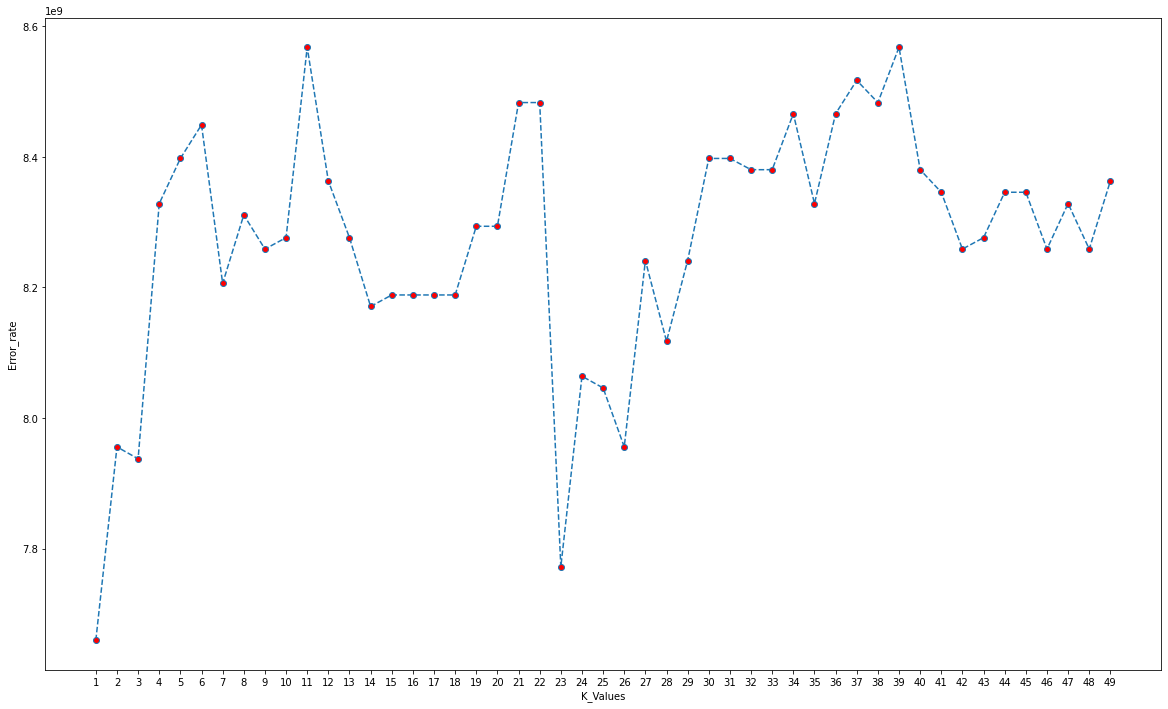

In [84]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,12))
plt.plot(k_value, error_list, linestyle='dashed', marker='o', markerfacecolor='red')
plt.xlabel('K_Values')
plt.xticks(k_value)
plt.ylabel('Error_rate')
plt.xticks(k_value)

### So the least error rate is for 23 and 1. Ofc we shouldn't use 1, that contradicts the whole point of using KNN algo. We had taken 25 and got 89 wrong predictions, lets try for 1-49.

In [90]:
error_preds = []
for a in range(1,50):
    knn_for_all = neighbors.KNeighborsClassifier(a, weights='uniform')
    knn_for_all.fit(X_train, Y_train)
    Y_pred = knn_for_all.predict(X_test)

    count = 0
    for i in range(len(Y_test)): 
        if Y_pred[i] != Y_test[i]:
            count +=1
    print('Wrong predictions: ' + str(count) + ' for k-value ' + str(a))
    error_preds.append(count)
    print('-----------------------')
    
    

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Wrong predictions: 91 for k-value 1
-----------------------
Wrong predictions: 98 for k-value 2
-----------------------
Wrong predictions: 87 for k-value 3
-----------------------
Wrong predictions: 96 for k-value 4
-----------------------
Wrong predictions: 90 for k-value 5
-----------------------
Wrong predictions: 103 for k-value 6
-----------------------
Wrong predictions: 93 for k-value 7
-----------------------
Wrong predictions: 100 for k-value 8
-----------------------
Wrong predictions: 93 for k-value 9
-----------------------
Wrong predictions: 90 for k-value 10
-----------------------
Wrong predictions: 101 for k-value 11
-----------------------
Wrong predictions: 90 for k-value 12
-----------------------
Wrong predictions: 94 for k-value 13
-----------------------
Wrong predictions: 93 for k-value 14
-----------------------
Wrong predictions: 93 for k-value 15
-----------------------
Wrong predictions: 93 for k-value 16
-----------------------
Wrong predictions: 93 for k-va

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Wrong predictions: 84 for k-value 27
-----------------------
Wrong predictions: 86 for k-value 28
-----------------------
Wrong predictions: 84 for k-value 29
-----------------------
Wrong predictions: 84 for k-value 30
-----------------------
Wrong predictions: 84 for k-value 31
-----------------------
Wrong predictions: 86 for k-value 32
-----------------------
Wrong predictions: 86 for k-value 33
-----------------------
Wrong predictions: 91 for k-value 34
-----------------------
Wrong predictions: 89 for k-value 35
-----------------------
Wrong predictions: 91 for k-value 36
-----------------------
Wrong predictions: 94 for k-value 37
-----------------------
Wrong predictions: 92 for k-value 38
-----------------------
Wrong predictions: 97 for k-value 39
-----------------------
Wrong predictions: 91 for k-value 40
-----------------------
Wrong predictions: 90 for k-value 41
-----------------------
Wrong predictions: 90 for k-value 42
-----------------------
Wrong predictions: 86 fo

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ankan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


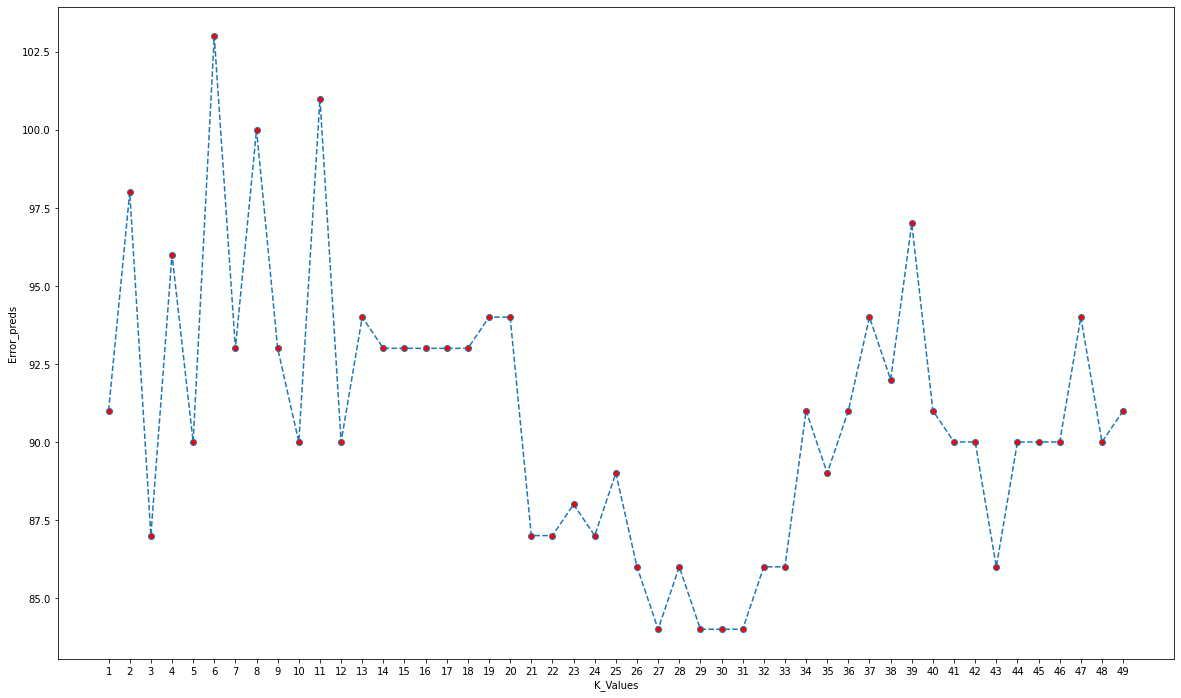

In [92]:
plt.figure(figsize=(20,12))
plt.plot(k_value, error_preds, linestyle='dashed', marker='o', markerfacecolor='red')
plt.xlabel('K_Values')
plt.xticks(k_value)
plt.ylabel('Error_preds')
plt.xticks(k_value)
plt.show()